In [ ]:
from datasets.vertebral_dataset import VertebralDataset
from models.mlp import ModelParams, test_model
from models.quantization import ActivationFunc, QMode

p = ModelParams(
    in_layer_height=VertebralDataset.input_size,
    in_bitwidth=32,
    out_height=VertebralDataset.output_size,
    hidden_height=32,
    hidden_bitwidth=32,
    model_layers=2,
    learning_rate=0.01,
    activation=ActivationFunc.RELU,
    epochs=10,
    dropout_rate=0.0,
    quantization_mode=QMode.DET,
)
train_loader, test_loader = VertebralDataset.get_dataloaders()

test_model(p, train_loader, test_loader, verbose=2)


Train Epoch: 0 [0/248] Loss: 30.0241
Train Epoch: 0 [160/248] Loss: 17.0026
Test batch loss: tensor(10.4602)
Test batch loss: tensor(15.8162)
Test set: Average loss: 13.1382, Accuracy: 28/62 (45.16%)

Train Epoch: 1 [0/248] Loss: 6.3321
Train Epoch: 1 [160/248] Loss: 8.4372
Test batch loss: tensor(5.4436)
Test batch loss: tensor(7.8036)
Test set: Average loss: 6.6236, Accuracy: 36/62 (58.06%)

Train Epoch: 2 [0/248] Loss: 10.7849
Train Epoch: 2 [160/248] Loss: 4.3371
Test batch loss: tensor(6.1726)
Test batch loss: tensor(5.4234)
Test set: Average loss: 5.7980, Accuracy: 23/62 (37.10%)

Train Epoch: 3 [0/248] Loss: 5.9208
Train Epoch: 3 [160/248] Loss: 2.4348
Test batch loss: tensor(2.4816)
Test batch loss: tensor(3.1812)
Test set: Average loss: 2.8314, Accuracy: 40/62 (64.52%)

Train Epoch: 4 [0/248] Loss: 3.4889
Train Epoch: 4 [160/248] Loss: 5.5592
Test batch loss: tensor(1.8249)
Test batch loss: tensor(1.6795)
Test set: Average loss: 1.7522, Accuracy: 42/62 (67.74%)

Train Epoch: 5

87.09677419354838

[ 8  8  4  4 10  1]
ModelParams(in_layer_height=6, in_bitwidth=2, out_height=3, hidden_height=np.int64(2), hidden_bitwidth=2, model_layers=np.int64(2), activation=<ActivationFunc.BINARIZE: 'binarize'>, dropout_rate=0.0, learning_rate=0.0001, epochs=20, quantization_mode=<QMode.DET: 'det'>)
ModelParams(in_layer_height=6, in_bitwidth=32, out_height=3, hidden_height=np.int64(8), hidden_bitwidth=32, model_layers=np.int64(8), activation=<ActivationFunc.BINARIZE: 'binarize'>, dropout_rate=0.0, learning_rate=0.2, epochs=20, quantization_mode=<QMode.STOCH: 'stoch'>)
[2 2 0 0 0 0]
Objective values on min bounds:  [np.float64(79.03225806451613), 0.0, 0.0, 0.0, 0.0]
NAS params for min bounds:  {'layers_amount': np.int64(2), 'hidden_height': np.int64(2), 'input_bitwidth': 2, 'hidden_bitwidth': 2, 'learning_rate': 0.0001, 'quantization_mode': <QMode.DET: 'det'>}
[ 8  8  4  4 10  1]
Objective values on max bounds:  [np.float64(24.19354838709677), 100.0, 100.0, 100.0, 100.0]
NAS params for max bounds

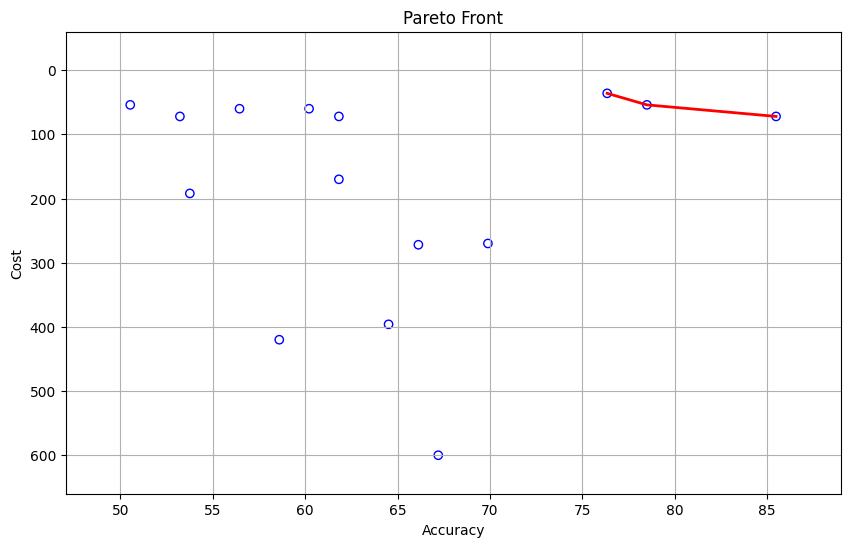

{'all':     layers_amount  hidden_height  input_bitwidth  hidden_bitwidth  \
 0               2              8               4                3   
 1               6              2               3                2   
 2               6              5               2                4   
 3               4              8               2                2   
 4               4              5               5                3   
 5               3              2               4                4   
 6               6              6               4                2   
 7               3              2               3                4   
 8               6              4               3                2   
 9               2              2               3                5   
 10              3              2               2                5   
 11              6              2               2               32   
 12              4              5               3                2   
 13          

In [1]:
from datasets.vertebral_dataset import VertebralDataset
from nas.mlp_nas_problem import NASParams
from nas.tooling import run_NAS_pipeline


nas_params = NASParams(
    min_accuracy=50,
    amount_of_evaluations=3,
    population_size=30,
    population_offspring_count=12,
    epochs=10,
)
vertebral_pf = run_NAS_pipeline(VertebralDataset, nas_params, n_gen=4)
vertebral_pf


n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |       40 |     24 |  0.000000E+00 |  0.000000E+00 |             - |             -
     2 |       56 |     30 |  0.000000E+00 |  0.000000E+00 |  0.0910855821 |             f
     3 |       72 |     35 |  0.000000E+00 |  0.000000E+00 |  0.0571428571 |         ideal
     4 |       88 |     34 |  0.000000E+00 |  0.000000E+00 |  0.0925925926 |         ideal
     5 |      104 |     32 |  0.000000E+00 |  0.000000E+00 |  0.0181818182 |         ideal
     6 |      120 |     34 |  0.000000E+00 |  0.000000E+00 |  2.0000000000 |         nadir
     7 |      136 |     31 |  0.000000E+00 |  0.000000E+00 |  0.1111111111 |         nadir
Best accuracy: 69.67741935483872


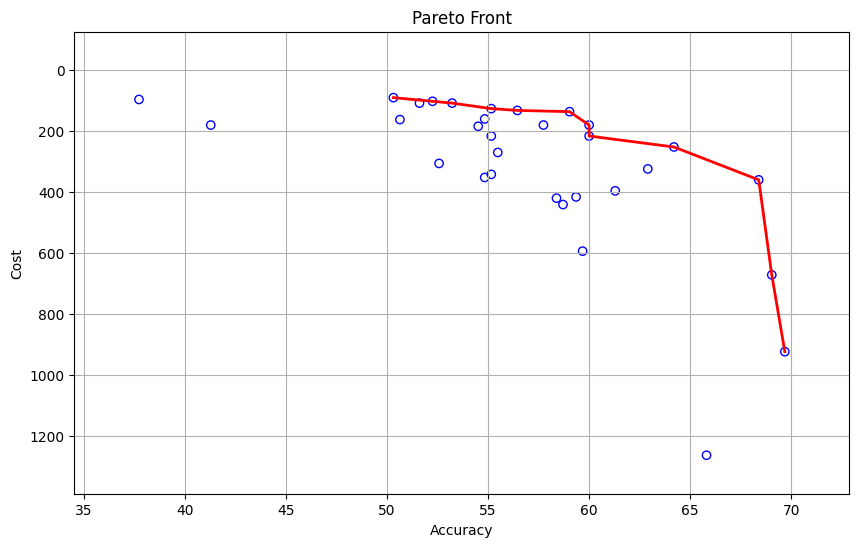

In [32]:
from constants import SEED

from nas.mlp_nas_problem import NASProblem, NASParams
from datasets.vertebral_dataset import VertebralDataset

from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.core.result import Result
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.repair.rounding import RoundingRepair
from pymoo.operators.sampling.rnd import IntegerRandomSampling
from pymoo.optimize import minimize
from pymoo.termination import get_termination

from src.nas.tooling import get_population_df, train_pf


nas_params = NASParams(
    min_accuracy=30,
    amount_of_evaluations=5,
    population_size=40,
    population_offspring_count=16,
    epochs=10,
)
problem = NASProblem(VertebralDataset, nas_params)

algorithm = NSGA2(
    pop_size=nas_params.population_size,
    n_offsprings=nas_params.population_offspring_count,
    sampling=IntegerRandomSampling(),
    crossover=SBX(prob=0.9, eta=15, repair=RoundingRepair()),
    mutation=PM(eta=20, repair=RoundingRepair()),
)

termination = get_termination("n_gen", 7)
res = minimize(
    problem,
    algorithm,
    termination,
    seed=SEED,
    save_history=True,
    verbose=True,
)

problem.show_metadata()

population = get_population_df(problem, res)

# population["pareto_trained"] = train_pf(population["pareto"], VertebralDataset, 10)

In [33]:
res.history

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n_evals = np.array([e.evaluator.n_eval for e in res.history])
opt = np.array([e.opt[0].F for e in res.history])

for idx, obj_name in enumerate(["accuracy", "1", "2", "3", "4"]):
    plt.plot(n_evals, opt[:, idx], "--", label=obj_name)

plt.legend()

plt.title("Convergence")
plt.yscale("log")
plt.show()

NameError: name 'res' is not defined